Iris flower project from kaggle (https://www.kaggle.com/code/agilesifaka/step-by-step-iris-ml-project/notebook)

The data set is from Ronald Fisher (c. 1930), characterizing iris flowers by length and width of pedals and sepals

In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(os.listdir('.'))

['Iris.csv', '.ipynb_checkpoints', 'iris_flower.ipynb']


In [2]:
# load data
iris_data = pd.read_csv('Iris.csv')

In [3]:
# look for missing data
def missing_value_describe(data):
    # check in training data
    missing_value_stats = (data.isnull().sum() / len(data)*100)
    missing_value_col_count = sum(missing_value_stats > 0)
    missing_value_stats = missing_value_stats.sort_values(ascending=False)[:missing_value_col_count]

    print(f'There are {missing_value_col_count} columns with missing values')
    if missing_value_col_count != 0:
        # print values of column names with missing values
        print('-------------------------------------------------------')
        print(missing_value_stats)
    else:
        print('No missing data.')

missing_value_describe(iris_data)

There are 0 columns with missing values
No missing data.


In [4]:
# look at the top of the data
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Each flower is identified by the Id number, so this should be removed from the data

In [5]:
# drop Id column
iris_data = iris_data.drop(['Id'], axis=1)
iris_data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
# look at the dimension of the data
print(f'There are {iris_data.shape[0]} rows and {iris_data.shape[1] + 1} columns, {iris_data.shape[1]} columns when Id is removed')

There are 150 rows and 6 columns, 5 columns when Id is removed


The first 4 columns are numerical data about the size of the flower, while the last column is the species which is the label

In [7]:
# look at the statistical summary
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Note, the range of the data is the difference between the max and min value

The absolute std is small, but the relative std when compared to the mean is actually quite large for most values

In [8]:
# look at class (label) distribution
iris_data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Text(0, 0.5, 'Count')

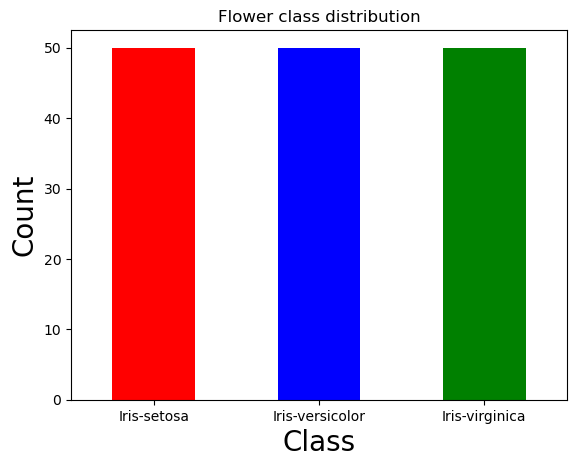

In [9]:
# data visualization
# bar chart of the class distribution
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
nameplot = iris_data['Species'].value_counts().plot.bar(title='Flower class distribution', color=['r', 'b', 'g'])
nameplot.set_xticklabels(labels, rotation=0)
nameplot.set_xlabel('Class', size=20)
nameplot.set_ylabel('Count', size=20)

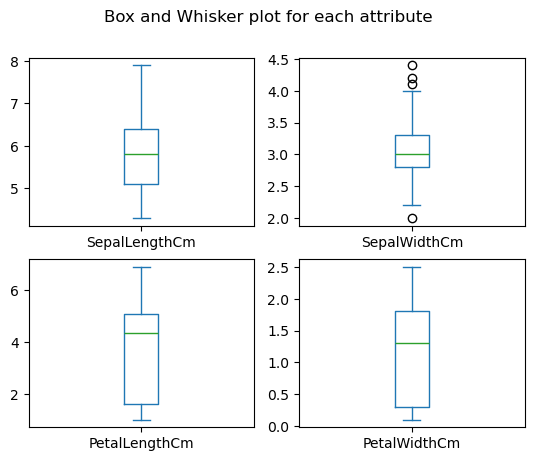

In [10]:
# box and whisker plots of each attribute
iris_data.plot(kind='box', subplots=True, layout=(2,2),
               sharex=False, sharey=False, title='Box and Whisker plot for each attribute')
plt.show()

Box plots show the minimum, maximum, and mean (green line in center of box) values, 
along with the data distribution over quartiles of data.  That means, 25% of the data
is below the bottom line of the box, 50% is below the green line, and 75% is below the
top line of the box.  The open circles in the SepalWidthCm plot are outliers.  

Note, a small box indicates the data is tightly clustered around the mean.  

Also, if the grean (mean) line is near the center of the box, the data has a symmmetric 
distribution.

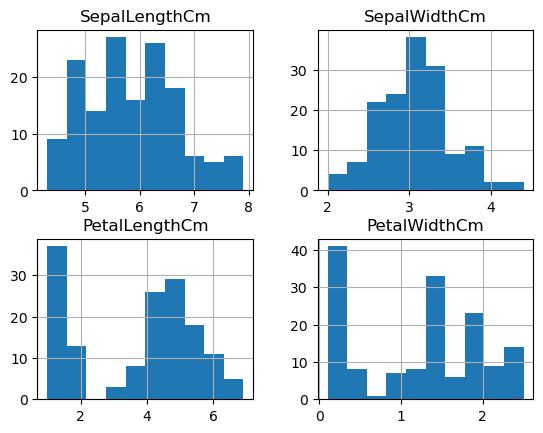

In [11]:
# histograms to show the normalness of the distribution (Gaussian, bimodal, etc)
iris_data.hist()
plt.show()

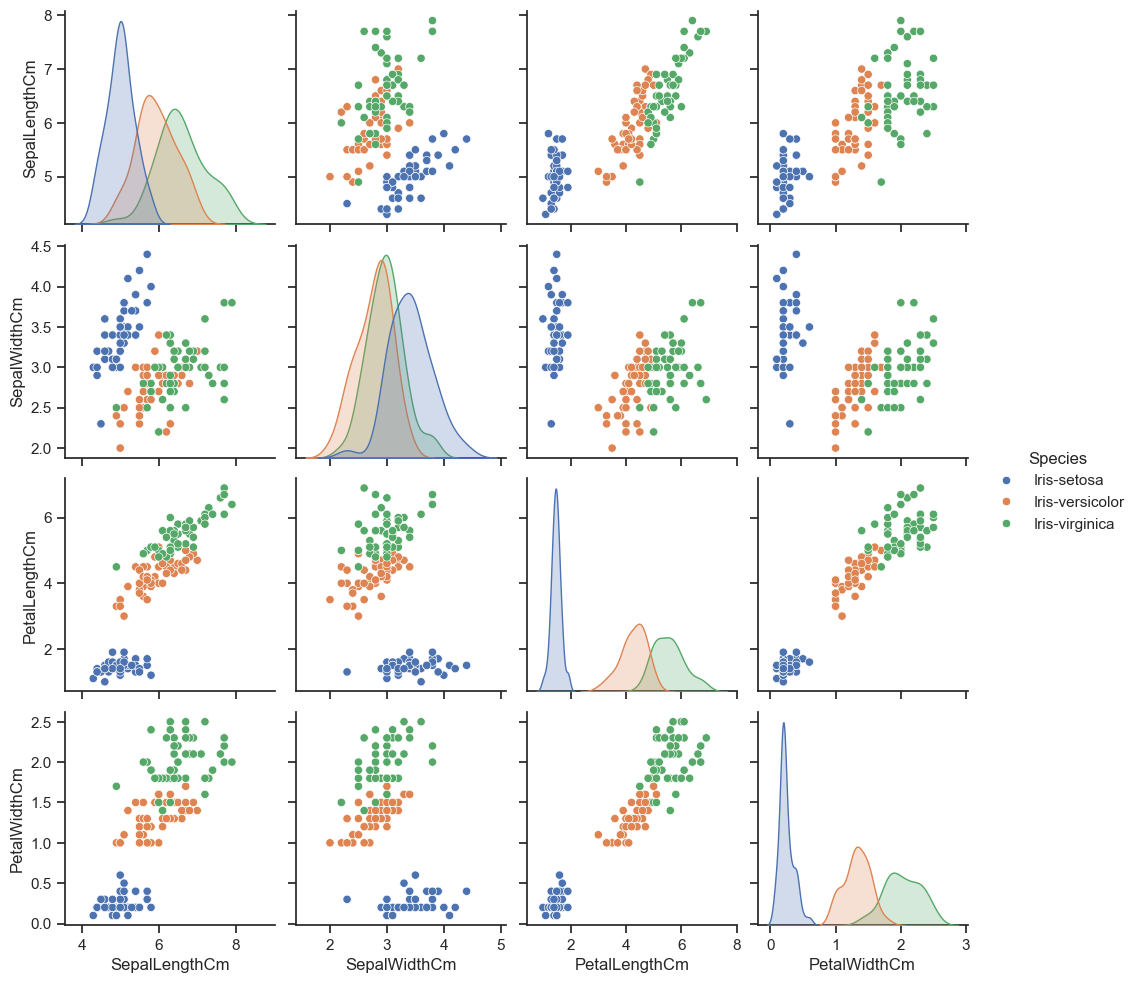

In [12]:
sns.set(style='ticks')
sns.pairplot(iris_data, hue='Species')

The goal is to use the Iris flower data to train a model to predict the species given its 4 features

In [13]:
# train data using sklearn

X = iris_data.drop(['Species'], axis=1)
Y = iris_data['Species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [17]:
print(f'The shape of the X training data is {X_train.shape}')
print(f'The shape of the X test data is {X_test.shape}')
print(f'The shape of the Y training data is {Y_train.shape}')
print(f'The shape of the Y test data is {Y_test.shape}')

The shape of the X training data is (120, 4)
The shape of the X test data is (30, 4)
The shape of the Y training data is (120,)
The shape of the Y test data is (30,)


In [18]:
# import different ML models
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [30]:
# models
models = []

# linear models
# models.append(('LR', LogisticRegression(solver='liblinear'), multi_class='auto'))) # this model is depreciated in new python versions
models.append(('LDA', LinearDiscriminantAnalysis()))

# non-linear models
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# evalute each model in turn
print('Model accuracy: ')
names = []
accuracy = []
for name, model in models: 
    # 10-fold cross validation for each model
    kfold = KFold(n_splits=10)
                  #, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

    names.append(name)
    accuracy.append(cv_results)
    print(f'For model {name}, the accuracy is a = {cv_results.mean():.3f} and the standard deviation is std = {cv_results.std():.3f}')

print(len(names))
print(len(accuracy))

Model accuracy: 
For model LDA, the accuracy is a = 0.975 and the standard deviation is std = 0.038
For model CART, the accuracy is a = 0.975 and the standard deviation is std = 0.038
For model KNN, the accuracy is a = 0.983 and the standard deviation is std = 0.033
For model GNB, the accuracy is a = 0.975 and the standard deviation is std = 0.053
For model SVC, the accuracy is a = 0.992 and the standard deviation is std = 0.025
5
5


In [32]:

ax = sns.boxplot(x=names, y=accuracy.mean(), data=df)
ax.set_title('Model Accuracy Comparison')

AttributeError: 'list' object has no attribute 'mean'

Model accuracy: 
For model LDA, the accuracy is a = 0.975 and the standard deviation is std = 0.038
For model CART, the accuracy is a = 0.950 and the standard deviation is std = 0.076
For model KNN, the accuracy is a = 0.983 and the standard deviation is std = 0.033
For model GNB, the accuracy is a = 0.967 and the standard deviation is std = 0.041
For model SVC, the accuracy is a = 0.992 and the standard deviation is std = 0.025

Total number of names collected: 50 (5 models * 10 folds)
Total number of accuracies collected: 50 (5 models * 10 folds)


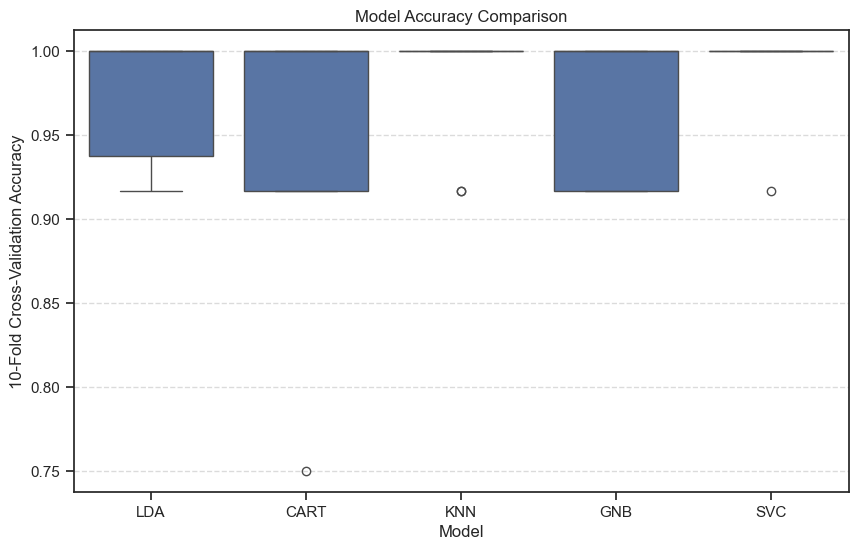

In [33]:
# 1. Setup Models
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# 2. Evaluate and Collect Results
print('Model accuracy: ')
all_names = []
all_accuracies = [] # This will be the single, flat list of all scores

# Assuming X_train and Y_train are defined earlier in your notebook
# You might need dummy data for a runnable example if X_train/Y_train are not present
# For example:
# from sklearn.datasets import load_iris
# data = load_iris()
# X_train, Y_train = data.data, data.target 

for name, model in models:
    # 10-fold cross validation for each model
    kfold = KFold(n_splits=10, shuffle=True, random_state=7) # Added shuffle/seed for reproducibility
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

    # Append data in the long-form format
    # The name must be repeated 10 times (once for each fold)
    all_names.extend([name] * len(cv_results))
    # The scores from all 10 folds are appended as individual scores
    all_accuracies.extend(cv_results.tolist())
    
    print(f'For model {name}, the accuracy is a = {cv_results.mean():.3f} and the standard deviation is std = {cv_results.std():.3f}')

print(f'\nTotal number of names collected: {len(all_names)} (5 models * 10 folds)')
print(f'Total number of accuracies collected: {len(all_accuracies)} (5 models * 10 folds)')

# 3. Create the DataFrame
results_df = pd.DataFrame({
    'Model': all_names,
    'Accuracy': all_accuracies
})

# 4. Plot the Box Plot
plt.figure(figsize=(10, 6))
# Pass the column names as strings to x and y, and the DataFrame to data
ax = sns.boxplot(x='Model', y='Accuracy', data=results_df)
ax.set_title('Model Accuracy Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylabel('10-Fold Cross-Validation Accuracy')
plt.show()

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma="auto")))

def test_model(model):
    model.fit(X_train, Y_train) # train the whole training set
    predictions = model.predict(X_test) # predict on test set
    
    # output model testing results
    print("Accuracy:", accuracy_score(Y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, predictions))
    print("Classification Report:")
    print(classification_report(Y_test, predictions))

for name, model in models:
    print("----------------")
    print("Testing", name)
    test_model(model)

----------------
Testing KNN
Accuracy: 0.9
Confusion Matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

----------------
Testing GNB
Accuracy: 0.8333333333333334
Confusion Matrix:
[[7 0 0]
 [0 9 3]
 [0 2 9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

       accuracy                           0.83        30
      macro avg       0.86      0.86      0.86        30
   wei

This shows that the SVC model has the highest accuracy, as well as the largest diagonal values in
the confusion matrix